<a href="https://colab.research.google.com/github/Rick-lo-Oliveira/europ-educacao-analysis/blob/main/FA_%26_Clustering_without_rotation_and_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Necessary Installs
!pip install factor_analyzer
!pip install pingouin pandas numpy
!pip install feature-engine

In [ ]:
#Necessary Imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer.rotator import Rotator
from factor_analyzer import FactorAnalyzer
import pingouin as pg
from numpy.linalg import inv
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from sklearn.impute import KNNImputer
import seaborn as sns

from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist

from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.preprocessing import StandardScaler
from feature_engine.outliers import Winsorizer
from sklearn.cluster import KMeans
from sklearn.metrics import explained_variance_score

In [ ]:
raw_excel = "/content/master_dataset_1.4.xlsx"

In [ ]:
master = pd.read_excel(raw_excel)

master = master.set_index("index_id")

master

,PISA_score,grad_ternary_1000,stu_ternary_100,a_edu_train_per_100,e_edu_train_per_100,income_0_2,income_3_4,income_5_8,gov_exp,prod,foreign_ed_0_2,foreign_ed_3_4,foreign_ed_5_8,NEET,emp_ed_0_2,emp_ed_3_4,emp_ed_5_8
index_id,,,,,,,,,,,,,,,,,
Austria_2015,493.907236,74.7,28.9,19.7,16.7,19286,24298,28758,10.72222,80.06,26.5,44.1,29.4,9.0,10.7,54.7,34.5
Austria_2018,493.989960,73.5,29.4,20.1,16.6,21290,26358,30743,10.68115,82.30,26.1,43.5,30.4,8.8,10.6,53.1,36.3
Austria_2022,489.922861,78.4,31.8,20.1,17.5,21587,28829,33334,9.93358,86.61,25.1,40.9,34.0,9.1,10.2,51.0,38.8
Belgium_2015,505.839337,79.6,36.6,13.8,6.9,16767,21920,28653,12.00727,85.44,37.0,32.8,30.2,13.6,15.3,38.3,45.8
Belgium_2018,502.546208,82.3,39.2,15.9,8.6,17672,24132,30644,12.18058,84.81,34.1,32.2,33.7,11.4,12.7,37.5,49.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Spain_2018,488.210239,96.3,40.3,16.2,11.2,11601,14882,20893,9.99577,62.15,41.2,33.1,25.7,15.3,32.8,23.9,43.2
Spain_2022,484.625645,108.0,40.5,21.2,17.1,13556,16320,22300,9.87539,63.89,42.5,31.3,26.2,12.7,29.8,23.8,46.4
Sweden_2015,495.592525,59.0,26.5,34.2,28.9,22787,27353,30508,15.18671,79.88,32.1,30.5,37.4,7.1,11.1,46.7,41.5


# Summary statistics

In [ ]:
# check the data type in each column (all columns should be float)
print("Tipos de dados atuais:")
print(master.info())

Tipos de dados atuais:
<class 'pandas.core.frame.DataFrame'>
Index: 81 entries, Austria_2015 to Sweden_2022
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PISA_score           81 non-null     float64
 1   grad_ternary_1000    81 non-null     float64
 2   stu_ternary_100      81 non-null     float64
 3   a_edu_train_per_100  81 non-null     float64
 4   e_edu_train_per_100  81 non-null     float64
 5   income_0_2           81 non-null     int64  
 6   income_3_4           81 non-null     float64
 7   income_5_8           81 non-null     float64
 8   gov_exp              81 non-null     float64
 9   prod                 81 non-null     float64
 10  foreign_ed_0_2       81 non-null     float64
 11  foreign_ed_3_4       81 non-null     float64
 12  foreign_ed_5_8       81 non-null     float64
 13  NEET                 81 non-null     float64
 14  emp_ed_0_2           81 non-null     float64
 15  emp_

In [ ]:
cols = master.columns

# Force conversion to numeric and ramdom things to Nan

for col in cols:
    master[col] = pd.to_numeric(master[col], errors='coerce')

numeric_master = master.select_dtypes(include=[np.number])

# generate summary
summary = numeric_master.describe().T
summary["variance"] = numeric_master.var()
summary["median"] = numeric_master.median()

summary

,count,mean,std,min,25%,50%,75%,max,variance,median
PISA_score,81.0,484.786827,22.275752,415.159637,473.878888,486.356045,498.143826,525.769626,4.962091e+02,486.356045
grad_ternary_1000,81.0,75.998272,22.260998,21.200000,62.500000,74.700000,84.700000,155.800000,4.955520e+02,74.700000
stu_ternary_100,81.0,34.401975,7.885719,8.300000,30.000000,35.500000,39.800000,52.100000,6.218457e+01,35.500000
a_edu_train_per_100,81.0,17.716049,7.823498,6.600000,12.000000,15.200000,21.200000,39.900000,6.120711e+01,15.200000
e_edu_train_per_100,81.0,13.577778,8.378634,1.100000,7.800000,11.000000,17.500000,35.300000,7.020150e+01,11.000000
income_0_2,81.0,13045.555556,8038.381134,1728.000000,5812.000000,11963.000000,19291.000000,34043.000000,6.461557e+07,11963.000000
income_3_4,81.0,16239.012346,9429.470236,2445.000000,7759.000000,14882.000000,23766.000000,41936.000000,8.891491e+07,14882.000000
income_5_8,81.0,20985.604938,11196.754305,4232.000000,10613.000000,19754.000000,30418.000000,55526.000000,1.253673e+08,19754.000000
gov_exp,81.0,11.120531,1.941397,6.386490,9.973760,11.106954,12.367294,15.515050,3.769021e+00,11.106954
prod,81.0,64.722099,29.472690,27.930000,44.740000,55.040000,80.060000,166.540000,8.686394e+02,55.040000


# Exploratory

In [ ]:
#Standardize data
scaler = StandardScaler()
numeric_master_st = scaler.fit_transform(numeric_master) #your code here

n_master_st = pd.DataFrame(
    numeric_master_st,
    columns=numeric_master.columns,
    index=numeric_master.index
)

n_master_st

,PISA_score,grad_ternary_1000,stu_ternary_100,a_edu_train_per_100,e_edu_train_per_100,income_0_2,income_3_4,income_5_8,gov_exp,prod,foreign_ed_0_2,foreign_ed_3_4,foreign_ed_5_8,NEET,emp_ed_0_2,emp_ed_3_4,emp_ed_5_8
index_id,,,,,,,,,,,,,,,,,
Austria_2015,0.411983,-0.058684,-0.702061,0.255169,0.374963,0.781168,0.859985,0.698490,-0.206446,0.523653,0.277957,0.039764,-0.404844,-0.718994,-0.358514,0.548488,-0.329683
Austria_2018,0.415720,-0.112926,-0.638260,0.306615,0.362953,1.032025,1.079810,0.876878,-0.227732,0.600129,0.245192,-0.016251,-0.313648,-0.761089,-0.368679,0.415047,-0.117182
Austria_2022,0.232003,0.108562,-0.332016,0.306615,0.471039,1.069203,1.343493,1.109726,-0.615200,0.747277,0.163279,-0.258983,0.014659,-0.697946,-0.409336,0.239906,0.177959
Belgium_2015,0.950975,0.162804,0.280472,-0.503668,-0.801967,0.465844,0.606225,0.689054,0.459599,0.707332,1.138040,-1.015184,-0.331887,0.249192,0.109048,-0.819282,1.004354
Belgium_2018,0.802219,0.284848,0.612236,-0.233574,-0.597805,0.579130,0.842271,0.867981,0.549426,0.685823,0.900493,-1.071199,-0.012700,-0.213853,-0.155226,-0.886003,1.441163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Spain_2018,0.154641,0.917669,0.752598,-0.194989,-0.285559,-0.180827,-0.144808,-0.008322,-0.582966,-0.087814,1.482073,-0.987177,-0.742270,0.607000,1.887815,-2.020251,0.697407
Spain_2022,-0.007281,1.446526,0.778118,0.448093,0.423001,0.063897,0.008642,0.118122,-0.645360,-0.028409,1.588560,-1.155221,-0.696672,0.059765,1.582884,-2.028591,1.075188
Sweden_2015,0.488110,-0.768347,-1.008305,2.120107,1.840120,1.219417,1.185988,0.855759,2.107510,0.517508,0.736668,-1.229908,0.324726,-1.118897,-0.317857,-0.118717,0.496711


In [ ]:
# imputation with KNN
imputer = KNNImputer(n_neighbors=5)


master_imputed_scaled_data = imputer.fit_transform(n_master_st)

# Assign the index back
master_imputed_scaled = pd.DataFrame(master_imputed_scaled_data,
                                     columns=numeric_master.columns,
                                     index=numeric_master.index)

master_imputed_scaled

,PISA_score,grad_ternary_1000,stu_ternary_100,a_edu_train_per_100,e_edu_train_per_100,income_0_2,income_3_4,income_5_8,gov_exp,prod,foreign_ed_0_2,foreign_ed_3_4,foreign_ed_5_8,NEET,emp_ed_0_2,emp_ed_3_4,emp_ed_5_8
index_id,,,,,,,,,,,,,,,,,
Austria_2015,0.411983,-0.058684,-0.702061,0.255169,0.374963,0.781168,0.859985,0.698490,-0.206446,0.523653,0.277957,0.039764,-0.404844,-0.718994,-0.358514,0.548488,-0.329683
Austria_2018,0.415720,-0.112926,-0.638260,0.306615,0.362953,1.032025,1.079810,0.876878,-0.227732,0.600129,0.245192,-0.016251,-0.313648,-0.761089,-0.368679,0.415047,-0.117182
Austria_2022,0.232003,0.108562,-0.332016,0.306615,0.471039,1.069203,1.343493,1.109726,-0.615200,0.747277,0.163279,-0.258983,0.014659,-0.697946,-0.409336,0.239906,0.177959
Belgium_2015,0.950975,0.162804,0.280472,-0.503668,-0.801967,0.465844,0.606225,0.689054,0.459599,0.707332,1.138040,-1.015184,-0.331887,0.249192,0.109048,-0.819282,1.004354
Belgium_2018,0.802219,0.284848,0.612236,-0.233574,-0.597805,0.579130,0.842271,0.867981,0.549426,0.685823,0.900493,-1.071199,-0.012700,-0.213853,-0.155226,-0.886003,1.441163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Spain_2018,0.154641,0.917669,0.752598,-0.194989,-0.285559,-0.180827,-0.144808,-0.008322,-0.582966,-0.087814,1.482073,-0.987177,-0.742270,0.607000,1.887815,-2.020251,0.697407
Spain_2022,-0.007281,1.446526,0.778118,0.448093,0.423001,0.063897,0.008642,0.118122,-0.645360,-0.028409,1.588560,-1.155221,-0.696672,0.059765,1.582884,-2.028591,1.075188
Sweden_2015,0.488110,-0.768347,-1.008305,2.120107,1.840120,1.219417,1.185988,0.855759,2.107510,0.517508,0.736668,-1.229908,0.324726,-1.118897,-0.317857,-0.118717,0.496711


## Summary statistics, Without missings

In [ ]:
#  Back to the original scale

master_imputed_reg_data = scaler.inverse_transform(master_imputed_scaled)

# redo the index
master_imputed_reg = pd.DataFrame(master_imputed_reg_data,
                                  columns=numeric_master.columns,
                                  index=numeric_master.index)


master_imputed_reg.to_excel('master_dataset_1.4_imputed.xlsx')

In [ ]:
# gerar o summary
summary = master_imputed_reg.describe().T
summary["variance"] = master_imputed_reg.var()
summary["median"] = master_imputed_reg.median()

summary

,count,mean,std,min,25%,50%,75%,max,variance,median
PISA_score,81.0,484.786827,22.275752,415.159637,473.878888,486.356045,498.143826,525.769626,4.962091e+02,486.356045
grad_ternary_1000,81.0,75.998272,22.260998,21.200000,62.500000,74.700000,84.700000,155.800000,4.955520e+02,74.700000
stu_ternary_100,81.0,34.401975,7.885719,8.300000,30.000000,35.500000,39.800000,52.100000,6.218457e+01,35.500000
a_edu_train_per_100,81.0,17.716049,7.823498,6.600000,12.000000,15.200000,21.200000,39.900000,6.120711e+01,15.200000
e_edu_train_per_100,81.0,13.577778,8.378634,1.100000,7.800000,11.000000,17.500000,35.300000,7.020150e+01,11.000000
income_0_2,81.0,13045.555556,8038.381134,1728.000000,5812.000000,11963.000000,19291.000000,34043.000000,6.461557e+07,11963.000000
income_3_4,81.0,16239.012346,9429.470236,2445.000000,7759.000000,14882.000000,23766.000000,41936.000000,8.891491e+07,14882.000000
income_5_8,81.0,20985.604938,11196.754305,4232.000000,10613.000000,19754.000000,30418.000000,55526.000000,1.253673e+08,19754.000000
gov_exp,81.0,11.120531,1.941397,6.386490,9.973760,11.106954,12.367294,15.515050,3.769021e+00,11.106954
prod,81.0,64.722099,29.472690,27.930000,44.740000,55.040000,80.060000,166.540000,8.686394e+02,55.040000


## Check Outliers

In [ ]:
# calculate IQR
Q1 = master_imputed_scaled.quantile(0.25)
Q3 = master_imputed_scaled.quantile(0.75)
IQR = Q3 - Q1

# bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify where the outliers are (returns True/False)
outliers_mask = (master_imputed_scaled < lower_bound) | (master_imputed_scaled > upper_bound)

# View outlier count by variable
print("Total number of outliers per column:")
print(outliers_mask.sum())

# See which countries/years are outliers (shows only the lines that have at least 1 outlier)
linhas_com_outliers = master_imputed_scaled[outliers_mask.any(axis=1)]
print("\nCountries with outliers:")
print(linhas_com_outliers.index.tolist())

Total number of outliers per column:
PISA_score              4
grad_ternary_1000       6
stu_ternary_100         3
a_edu_train_per_100     3
e_edu_train_per_100     2
income_0_2              0
income_3_4              0
income_5_8              0
gov_exp                 0
prod                    4
foreign_ed_0_2          0
foreign_ed_3_4          0
foreign_ed_5_8          0
NEET                    3
emp_ed_0_2             11
emp_ed_3_4              0
emp_ed_5_8              0
dtype: int64

Countries with outliers:
['Bulgaria_2018', 'Bulgaria_2022', 'Denmark_2015', 'Greece_2015', 'Ireland_2015', 'Ireland_2018', 'Ireland_2022', 'Italy_2015', 'Italy_2018', 'Italy_2022', 'Luxembourg_2015', 'Luxembourg_2018', 'Luxembourg_2022', 'Malta_2015', 'Malta_2018', 'Portugal_2015', 'Portugal_2018', 'Portugal_2022', 'Romania_2015', 'Romania_2018', 'Romania_2022', 'Spain_2015', 'Spain_2018', 'Spain_2022', 'Sweden_2018', 'Sweden_2022']


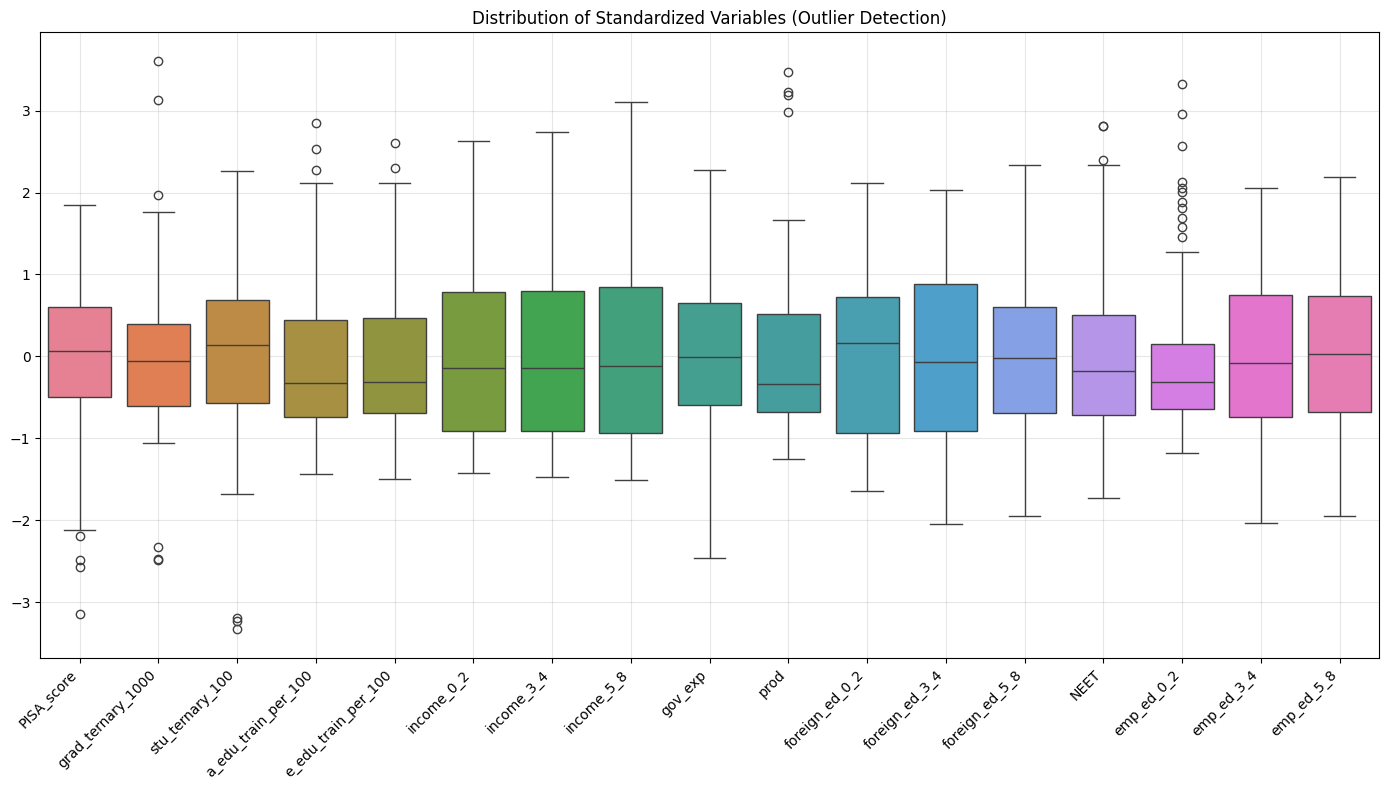

In [ ]:
# Boxplot to view the outliers (the same as before but visual)
plt.figure(figsize=(14, 8))
sns.boxplot(data=master_imputed_scaled)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Standardized Variables (Outlier Detection)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# replace values below the lower with the lower, and above the upper with the upper
master_capped = master_imputed_scaled.clip(lower=lower_bound, upper=upper_bound, axis=1)


original_sum = outliers_mask.sum().sum()
new_outliers = ((master_capped < lower_bound) | (master_capped > upper_bound)).sum().sum()

master_imputed_scaled = master_capped
print(f"Total of outliers before: {original_sum}")
print(f"Total of outliers after: {new_outliers}")

Total of outliers before: 36
Total of outliers after: 0


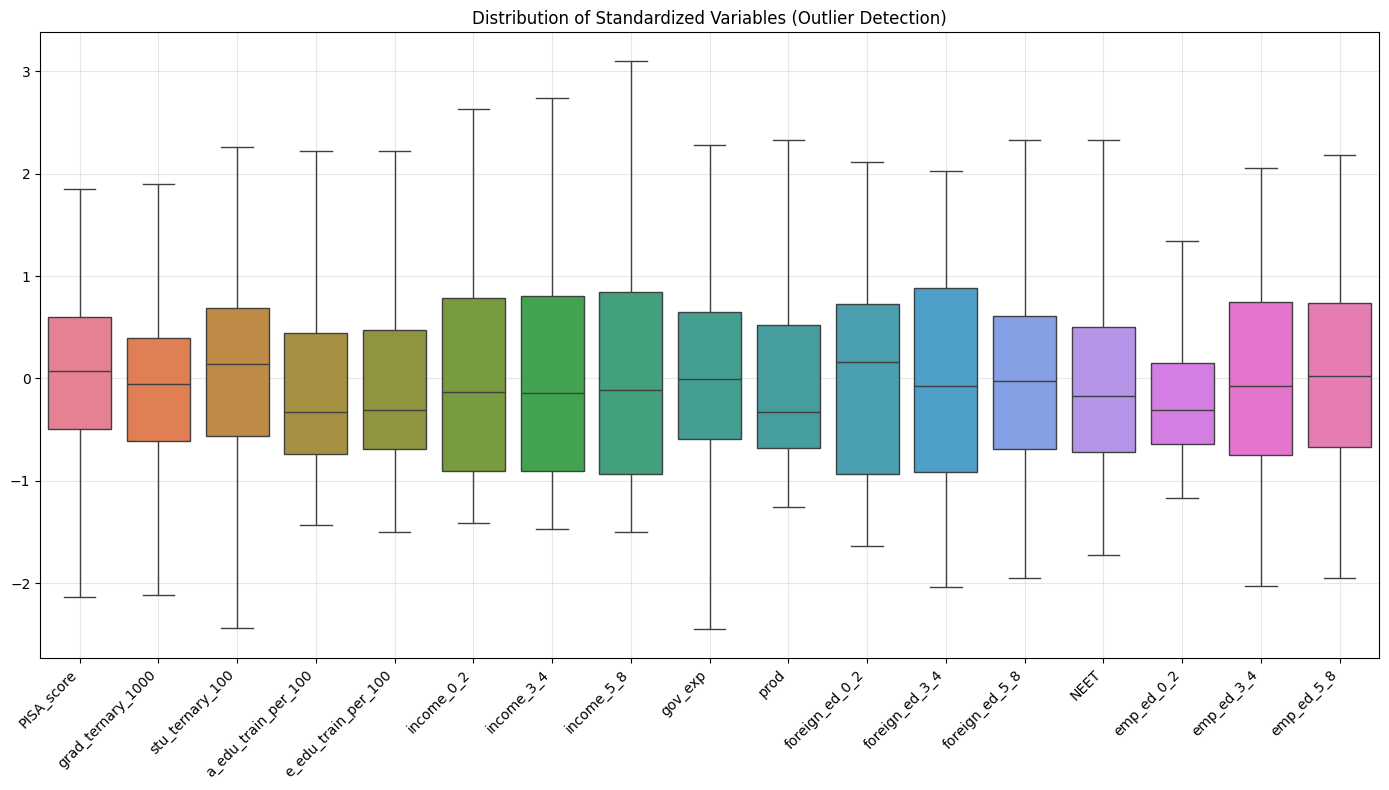

In [ ]:
# Boxplot to view the outliers (the same as before but visual)
plt.figure(figsize=(14, 8))
sns.boxplot(data=master_imputed_scaled)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Standardized Variables (Outlier Detection)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Correlations

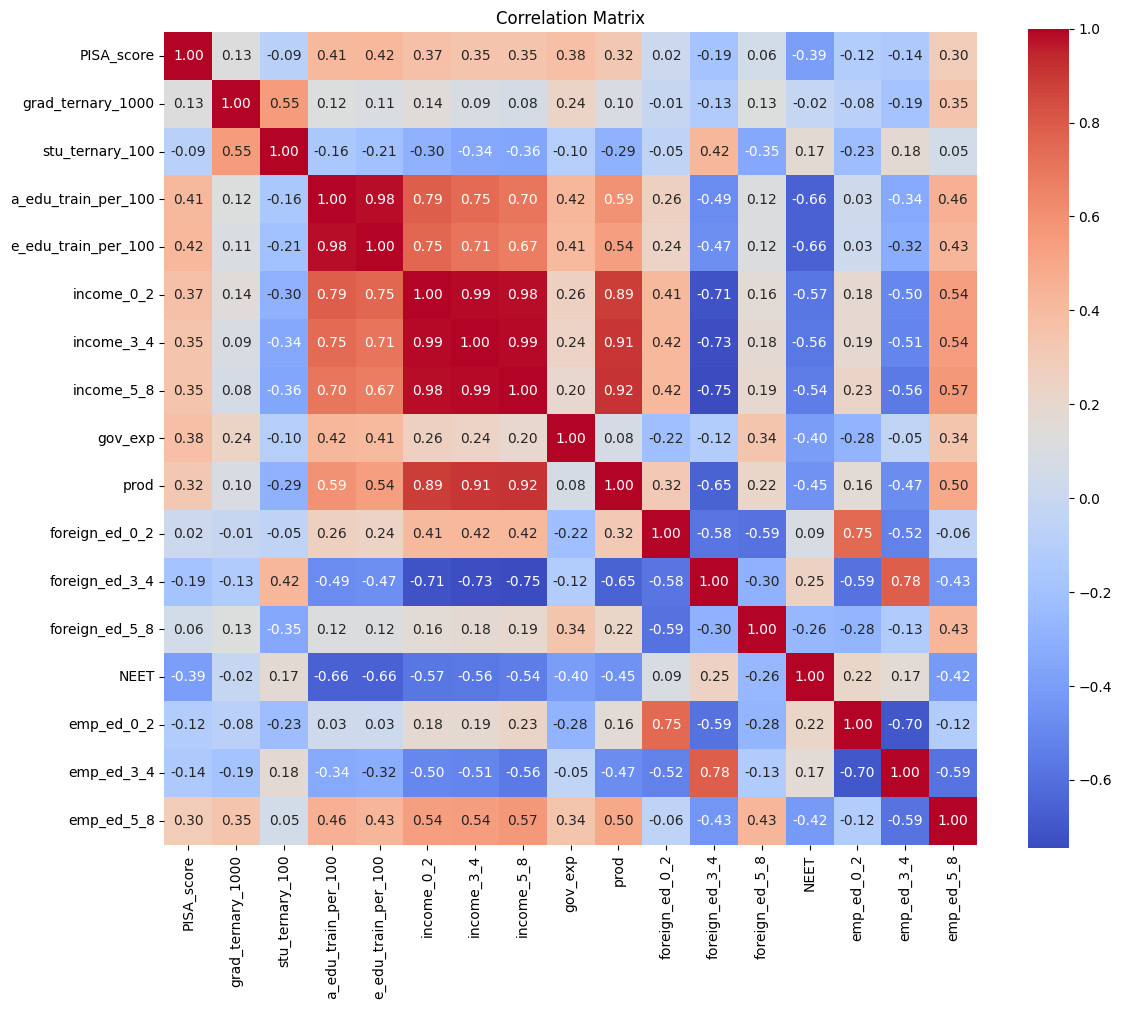

In [ ]:
#Correlation Matrix

corr_matrix = master_imputed_scaled.corr() #your code here

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

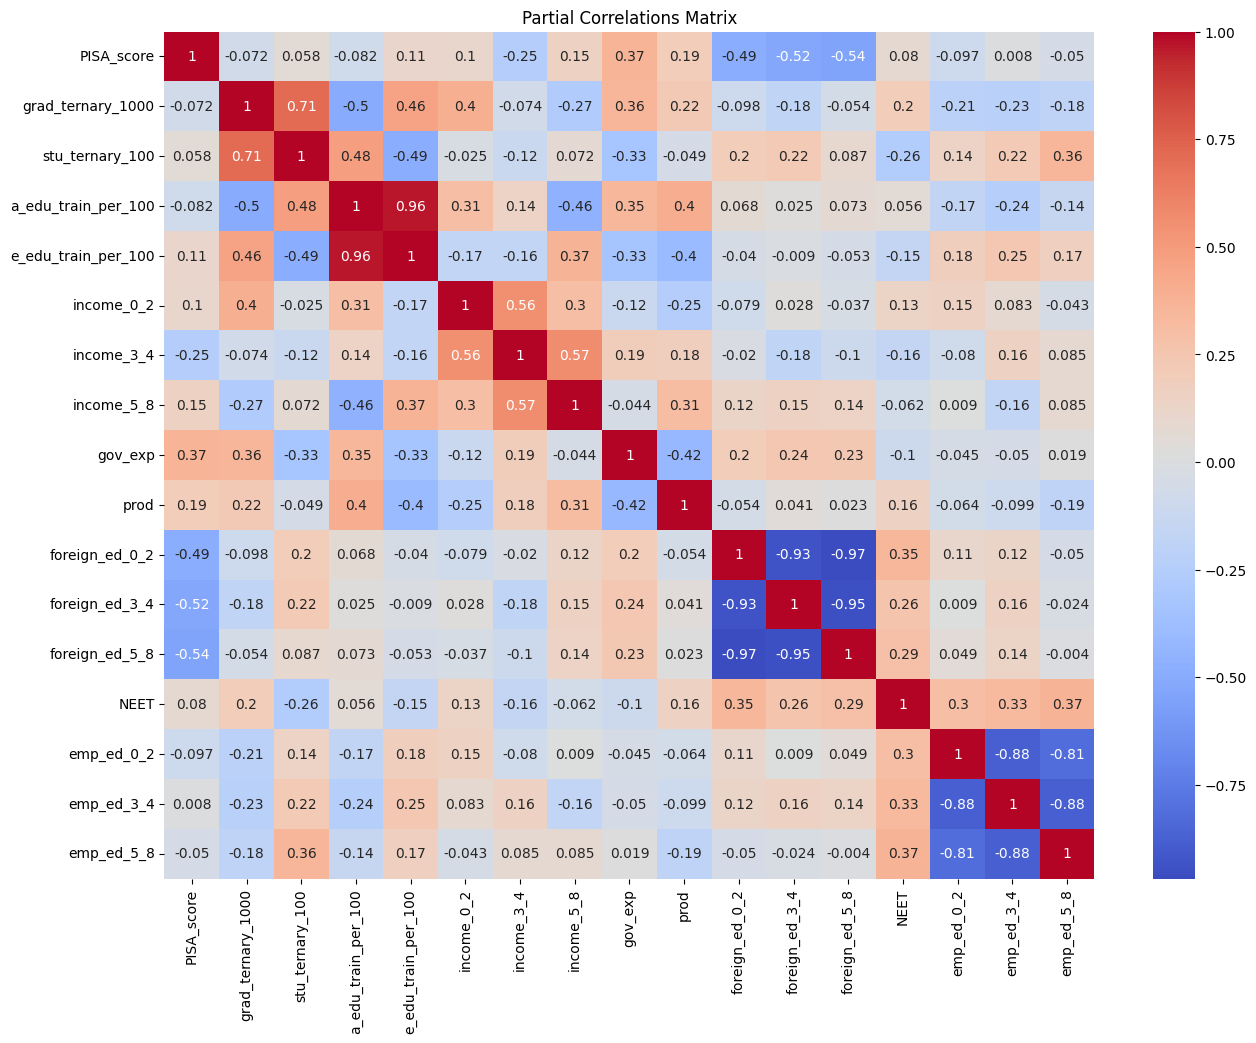

In [ ]:
#Partial correlations

partial_corr_matrix = pd.DataFrame(index=master_imputed_scaled.columns, columns=master_imputed_scaled.columns)

for var1 in master_imputed_scaled.columns:
    for var2 in master_imputed_scaled.columns:
        if var1 == var2:
            partial_corr_matrix.loc[var1, var2] = 1.0
        else:
            covariates = [col for col in master_imputed_scaled.columns if col not in [var1, var2]]
            result = pg.partial_corr(data=master_imputed_scaled, x=var1, y=var2, covar=covariates)
            partial_corr_matrix.loc[var1, var2] = result['r'].values[0]

partial_corr_matrix = partial_corr_matrix.astype(float)


plt.figure(figsize=(15, 11))
sns.heatmap(partial_corr_matrix.round(3), annot=True, cmap='coolwarm')
plt.title('Partial Correlations Matrix')
plt.show()

# KMO

In [ ]:
#KMO
kmo_all, kmo_model = calculate_kmo(master_imputed_scaled) #your code here

#KMO Overall
print(f"KMO Overall: {kmo_model:.2f}")

kmo_all_series = pd.Series(kmo_all, index=master.columns)
print("\nIndividual KMO:")
print(kmo_all_series.sort_values().round(2))

KMO Overall: 0.67

Individual KMO:
grad_ternary_1000      0.29
foreign_ed_5_8         0.34
stu_ternary_100        0.46
foreign_ed_0_2         0.50
emp_ed_0_2             0.52
PISA_score             0.54
gov_exp                0.56
emp_ed_5_8             0.60
emp_ed_3_4             0.61
foreign_ed_3_4         0.65
a_edu_train_per_100    0.67
e_edu_train_per_100    0.68
NEET                   0.77
prod                   0.84
income_5_8             0.85
income_3_4             0.86
income_0_2             0.88
dtype: float64


/usr/local/lib/python3.12/dist-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


In [ ]:
# list of variables to drop
vars_to_drop = ['grad_ternary_1000']

# Create the cleaned dataframe
master_cleaned = master_imputed_scaled.drop(columns=vars_to_drop)

# Re-calculate KMO
kmo_all, kmo_model = calculate_kmo(master_cleaned)

# Print results
print(f"New Overall KMO: {kmo_model:.2f}")
kmo_series_new = pd.Series(kmo_all, index=master_cleaned.columns)
print("\nNew Individual KMOs:")
print(kmo_series_new.sort_values().round(2))

New Overall KMO: 0.71

New Individual KMOs:
foreign_ed_5_8         0.34
foreign_ed_0_2         0.50
emp_ed_0_2             0.54
PISA_score             0.54
emp_ed_5_8             0.60
stu_ternary_100        0.60
emp_ed_3_4             0.62
foreign_ed_3_4         0.65
gov_exp                0.67
e_edu_train_per_100    0.75
a_edu_train_per_100    0.76
NEET                   0.79
income_3_4             0.84
income_5_8             0.86
prod                   0.87
income_0_2             0.89
dtype: float64


/usr/local/lib/python3.12/dist-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


In [ ]:
# list of variables to drop
vars_to_drop = ['grad_ternary_1000','foreign_ed_5_8']

# Create the cleaned dataframe
master_cleaned = master_imputed_scaled.drop(columns=vars_to_drop)

# Re-calculate KMO
kmo_all, kmo_model = calculate_kmo(master_cleaned)

# Print results
print(f"New Overall KMO: {kmo_model:.2f}")
kmo_series_new = pd.Series(kmo_all, index=master_cleaned.columns)
print("\nNew Individual KMOs:")
print(kmo_series_new.sort_values().round(2))

New Overall KMO: 0.76

New Individual KMOs:
stu_ternary_100        0.49
emp_ed_0_2             0.51
emp_ed_5_8             0.58
emp_ed_3_4             0.62
gov_exp                0.69
foreign_ed_0_2         0.70
e_edu_train_per_100    0.75
a_edu_train_per_100    0.76
PISA_score             0.79
NEET                   0.80
income_3_4             0.82
prod                   0.84
income_5_8             0.87
income_0_2             0.88
foreign_ed_3_4         0.94
dtype: float64


/usr/local/lib/python3.12/dist-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


In [ ]:
# list of variables to drop
vars_to_drop = ['grad_ternary_1000','foreign_ed_5_8','stu_ternary_100']

# Create the cleaned dataframe
master_cleaned = master_imputed_scaled.drop(columns=vars_to_drop)

# Re-calculate KMO
kmo_all, kmo_model = calculate_kmo(master_cleaned)

# Print results
print(f"New Overall KMO: {kmo_model:.2f}")
kmo_series_new = pd.Series(kmo_all, index=master_cleaned.columns)
print("\nNew Individual KMOs:")
print(kmo_series_new.sort_values().round(2))

New Overall KMO: 0.77

New Individual KMOs:
emp_ed_0_2             0.49
emp_ed_5_8             0.59
emp_ed_3_4             0.61
gov_exp                0.67
a_edu_train_per_100    0.74
e_edu_train_per_100    0.75
foreign_ed_0_2         0.77
PISA_score             0.78
income_3_4             0.83
NEET                   0.83
prod                   0.84
income_5_8             0.86
income_0_2             0.92
foreign_ed_3_4         0.92
dtype: float64


/usr/local/lib/python3.12/dist-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


In [ ]:
# list of variables to drop
vars_to_drop = ['grad_ternary_1000','foreign_ed_5_8','stu_ternary_100', 'emp_ed_0_2']

# Create the cleaned dataframe
master_cleaned = master_imputed_scaled.drop(columns=vars_to_drop)

# Re-calculate KMO
kmo_all, kmo_model = calculate_kmo(master_cleaned)

# Print results
print(f"New Overall KMO: {kmo_model:.2f}")
kmo_series_new = pd.Series(kmo_all, index=master_cleaned.columns)
print("\nNew Individual KMOs:")
print(kmo_series_new.sort_values().round(2))

New Overall KMO: 0.78

New Individual KMOs:
foreign_ed_0_2         0.55
emp_ed_3_4             0.63
gov_exp                0.64
emp_ed_5_8             0.72
a_edu_train_per_100    0.74
e_edu_train_per_100    0.74
PISA_score             0.78
income_3_4             0.80
foreign_ed_3_4         0.83
prod                   0.83
income_5_8             0.84
NEET                   0.87
income_0_2             0.92
dtype: float64


/usr/local/lib/python3.12/dist-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


# Factor Analysis

In [ ]:
#Initialize FA
fa = FactorAnalyzer()
fa.fit(master_cleaned) #your code here

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


FactorAnalyzer(rotation_kwargs={})

## Criteria

In [ ]:
#Kaiser Criterion

eigenvalues, _ = fa.get_eigenvalues()
print("Eigenvalues:\n", eigenvalues)

Eigenvalues:
 [7.14528941e+00 2.01914608e+00 1.01194636e+00 8.25203033e-01
 6.95384585e-01 5.02428359e-01 3.61024734e-01 2.26122828e-01
 1.18444715e-01 6.95100823e-02 1.46951647e-02 7.09523266e-03
 3.70941066e-03]


In [ ]:
#Pearson Criterion

variance_ratio = eigenvalues / np.sum(eigenvalues)
cumulative_variance = np.cumsum(variance_ratio)
print("Cumulative variance:")
print(cumulative_variance)

Cumulative variance:
[0.54963765 0.70495658 0.7827986  0.84627576 0.89976688 0.93841522
 0.96618635 0.98358041 0.99269155 0.99803848 0.99916887 0.99971466
 1.        ]


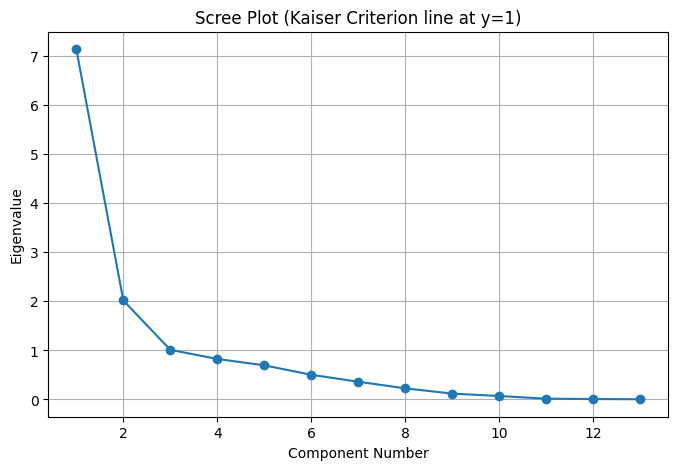

In [ ]:
#Scree Plot

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(eigenvalues)+1), eigenvalues, marker='o')
plt.title('Scree Plot (Kaiser Criterion line at y=1)')
plt.xlabel('Component Number')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()

## Rotations

In [ ]:
#Perform FA with the number of factors you want to retain

n_factors = 2 #your code here
fa = FactorAnalyzer(n_factors, rotation=None, method="principal")
fa.fit(master_cleaned)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


FactorAnalyzer(method='principal', n_factors=2, rotation=None,
               rotation_kwargs={})

In [ ]:
#Loadings without rotation

loadings = fa.loadings_#your code here

loadings_df = pd.DataFrame(loadings, index=master_cleaned.columns, columns=["F1","F2"]) #your code here
loadings_df

,F1,F2
PISA_score,0.454477,0.413265
a_edu_train_per_100,0.843701,0.285742
e_edu_train_per_100,0.817678,0.306644
income_0_2,0.962871,-0.054796
income_3_4,0.957135,-0.090531
income_5_8,0.950812,-0.135131
gov_exp,0.342354,0.646923
prod,0.853273,-0.162629
foreign_ed_0_2,0.404392,-0.700952
foreign_ed_3_4,-0.770038,0.444293


In [ ]:
#Communalities

communalities = fa.get_communalities()#your code here
print("\nCommunalities:\n", communalities)


Communalities:
 [0.37733769 0.79347922 0.76262848 0.93012385 0.92430417 0.92230352
 0.53571621 0.75452267 0.65486622 0.79035524 0.67289069 0.61268155
 0.43322598]


In [ ]:
#RMSR

# Recalculate corr_matrix with the updated master_imputed_scaled
corr_matrix = master_cleaned.corr()

reconstructed_corr = np.dot(loadings, loadings.T)

residuals = corr_matrix.values - reconstructed_corr

mask = ~np.eye(residuals.shape[0], dtype=bool)

rmsr = np.sqrt(np.mean(residuals[mask]**2))

print(f"RMSR: {rmsr:.3f}")

RMSR: 0.085


### Varimax

In [ ]:
#Perform FA with the number of factors you want to retain

n_factors = 2 #your code here
fa_varimax = FactorAnalyzer(n_factors, rotation="varimax", method="principal")
fa_varimax.fit(master_cleaned)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


FactorAnalyzer(method='principal', n_factors=2, rotation='varimax',
               rotation_kwargs={})

In [ ]:
#Loadings with varimax rotation

loadings = fa_varimax.loadings_#your code here

loadings_df = pd.DataFrame(loadings, index=master_cleaned.columns, columns=["F1","F2"]) #your code here
loadings_df

,F1,F2
PISA_score,0.071283,0.610128
a_edu_train_per_100,0.448543,0.769603
e_edu_train_per_100,0.415192,0.768274
income_0_2,0.762068,0.591081
income_3_4,0.781213,0.560367
income_5_8,0.805737,0.522582
gov_exp,-0.166730,0.712683
prod,0.750245,0.437784
foreign_ed_0_2,0.765319,-0.262971
foreign_ed_3_4,-0.872473,-0.170721


### Quartimax

In [ ]:
#Perform FA with the number of factors you want to retain

n_factors = 2 #your code here
fa_quartimax = FactorAnalyzer(n_factors, rotation="quartimax", method="principal")
fa_quartimax.fit(master_cleaned)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


FactorAnalyzer(method='principal', n_factors=2, rotation='quartimax',
               rotation_kwargs={})

In [ ]:
#Loadings with quartimax rotation

loadings = fa_quartimax.loadings_#your code here

loadings_df = pd.DataFrame(loadings, index=master_cleaned.columns, columns=["F1","F2"]) #your code here
loadings_df

,F1,F2
PISA_score,0.426431,0.442148
a_edu_train_per_100,0.823171,0.340394
e_edu_train_per_100,0.795836,0.359547
income_0_2,0.964393,0.008394
income_3_4,0.961010,-0.027641
income_5_8,0.957621,-0.072559
gov_exp,0.299243,0.667960
prod,0.862093,-0.106387
foreign_ed_0_2,0.449439,-0.672957
foreign_ed_3_4,-0.797488,0.392898


# Interpreting the Factors

In [ ]:
#Interpretation - get factor scores

fa_varimax = FactorAnalyzer(n_factors=2, rotation="varimax", method="principal") #your code here
fa_varimax.fit(master_cleaned) #your code here

factor_scores = fa_varimax.transform(master_cleaned) #your code here
factor_scores_df = pd.DataFrame(factor_scores, columns=["F1", "F2"]) #your code here
factor_scores_df

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,F1,F2
0,0.260797,0.437391
1,0.393669,0.498607
2,0.656196,0.395963
3,0.967465,-0.223703
4,0.951426,0.097751
...,...,...
76,1.188882,-0.988471
77,1.298733,-0.605205
78,0.470564,1.670798
79,0.496356,1.858783


# Clustering

## Hierarchical

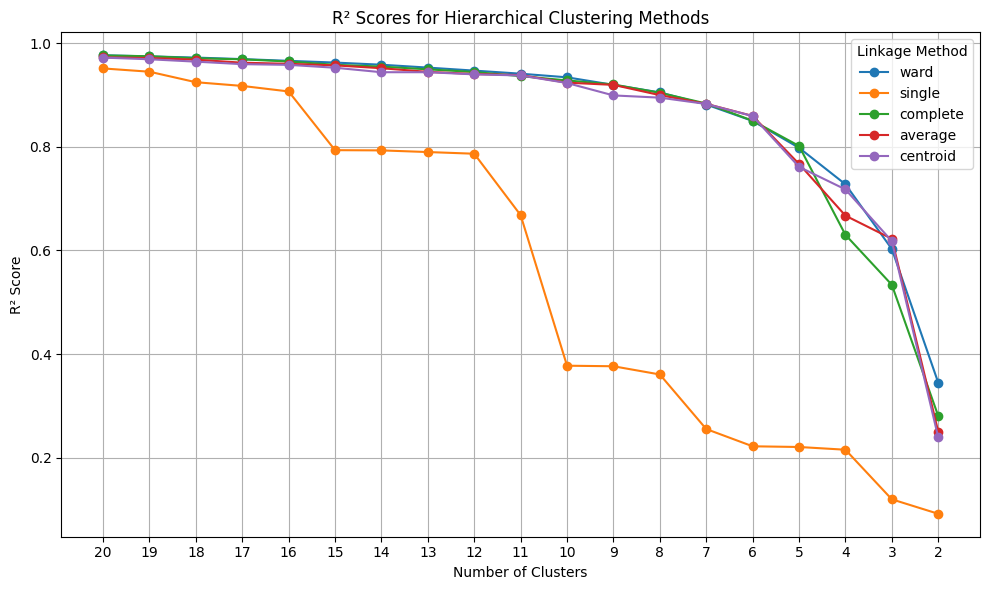

In [ ]:
#Choose the best method for hierarchical clustering

methods = ['ward', 'single', 'complete', 'average', 'centroid']
max_clusters = 20

grand_centroid = factor_scores_df.mean().values
tss = ((factor_scores_df.values - grand_centroid) ** 2).sum()

results = []

for method in methods:
    Z = linkage(factor_scores_df, method=method)

    for k in range(2, max_clusters + 1):
        labels = fcluster(Z, k, criterion='maxclust')

        wss = 0
        for cluster_id in np.unique(labels):
            cluster_points = factor_scores_df.values[labels == cluster_id]
            centroid = cluster_points.mean(axis=0)
            wss += ((cluster_points - centroid) ** 2).sum()

        r_squared = 1 - wss / tss
        results.append({'method': method, 'clusters': k, 'R_squared': r_squared})

df_r2 = pd.DataFrame(results, columns=['method', 'clusters', 'R_squared'])
df_pivot = df_r2.pivot(index='clusters', columns='method', values='R_squared')

# Plot
plt.figure(figsize=(10, 6))
for method in methods:
    plt.plot(df_pivot.index, df_pivot[method], marker='o', label=method)

plt.title('R² Scores for Hierarchical Clustering Methods')
plt.xlabel('Number of Clusters')
plt.ylabel('R² Score')
plt.xticks(df_pivot.index)
plt.legend(title='Linkage Method')
plt.grid(True)
plt.gca().invert_xaxis()
plt.tight_layout()
plt.show()

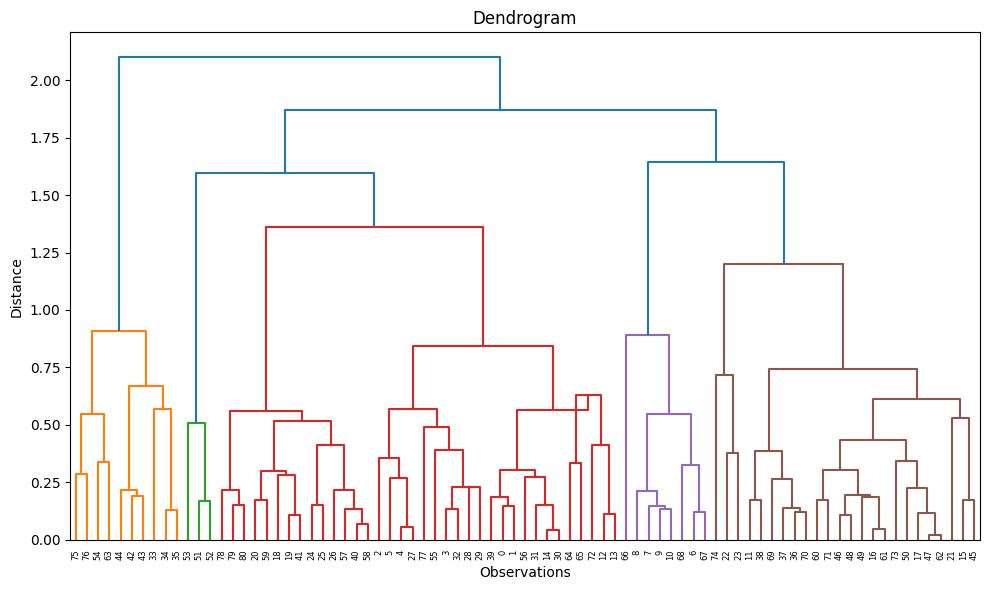

In [ ]:
#Dendrogram

Z = linkage(factor_scores_df, method = 'centroid') #your code here

plt.figure(figsize=(10, 6))
dendrogram(Z, labels=factor_scores_df.index.tolist(), leaf_rotation=90)
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

In [114]:
#Choose the number of clusters

n_clusters = 6 #your code here

hierarchical_labels = fcluster(Z, n_clusters, criterion = 'maxclust') #your code here

In [115]:
#Assign Cluster labels

factor_scores_df['Cluster'] = hierarchical_labels #your code here
factor_scores_df

,F1,F2,Cluster
index_id,,,
Austria_2015,0.260797,0.437391,4
Austria_2018,0.393669,0.498607,4
Austria_2022,0.656196,0.395963,4
Belgium_2015,0.967465,-0.223703,4
Belgium_2018,0.951426,0.097751,4
...,...,...,...
Spain_2018,1.188882,-0.988471,1
Spain_2022,1.298733,-0.605205,4
Sweden_2015,0.470564,1.670798,3


In [112]:
"""fa_scores_df_with_index = factor_scores_df.copy()
fa_scores_df_with_index.index = master_imputed_scaled.index
fa_scores_df_with_index.to_excel('fa_scores_df_with_index.xlsx')"""

In [116]:
#Initial Seeds

initial_seeds = factor_scores_df.groupby('Cluster').mean() #your code here
initial_seeds

,F1,F2
Cluster,,
1,0.937986,-1.586114
2,2.128335,0.478743
3,0.570074,1.356384
4,0.509303,-0.004960
5,-0.797116,-1.334893
6,-1.190569,0.259325


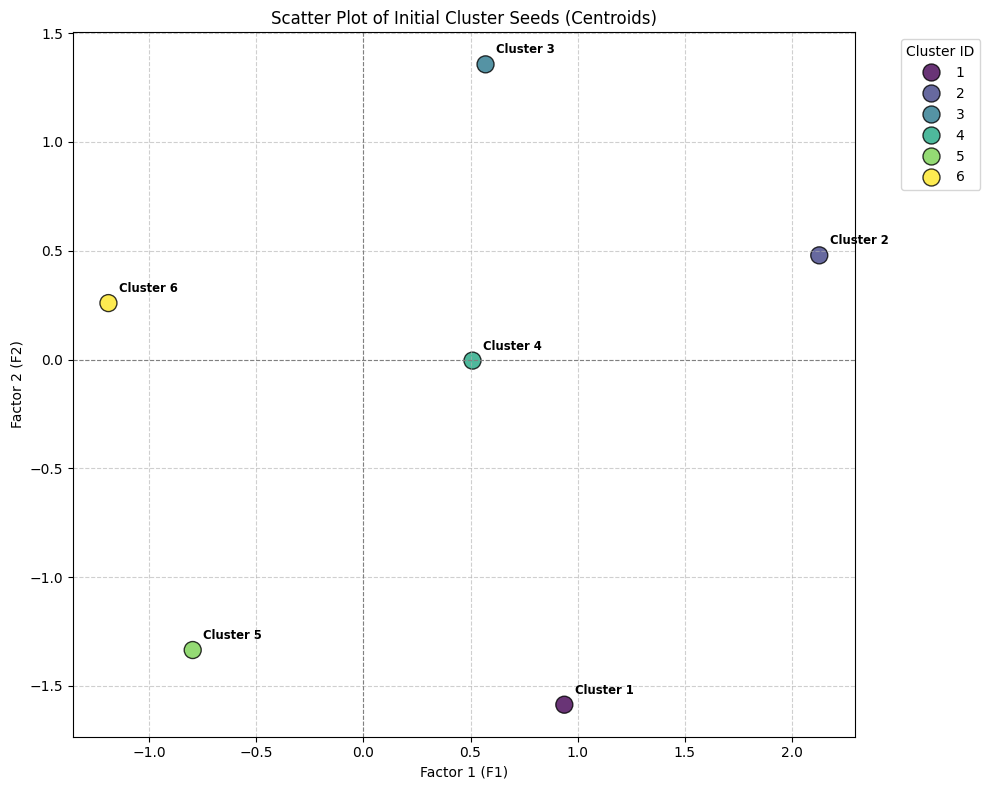

In [117]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=initial_seeds.reset_index(), x='F1', y='F2', hue='Cluster', palette='viridis', s=150, edgecolor='black', alpha=0.8)

for i, row in initial_seeds.reset_index().iterrows():
    plt.text(row['F1'] + 0.05, row['F2'] + 0.05, f"Cluster {int(row['Cluster'])}", horizontalalignment='left', size='small', color='black', weight='semibold')

plt.title('Scatter Plot of Initial Cluster Seeds (Centroids)')
plt.xlabel('Factor 1 (F1)')
plt.ylabel('Factor 2 (F2)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)
plt.legend(title='Cluster ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [119]:
factor_scores_df.index = master_imputed_scaled.index

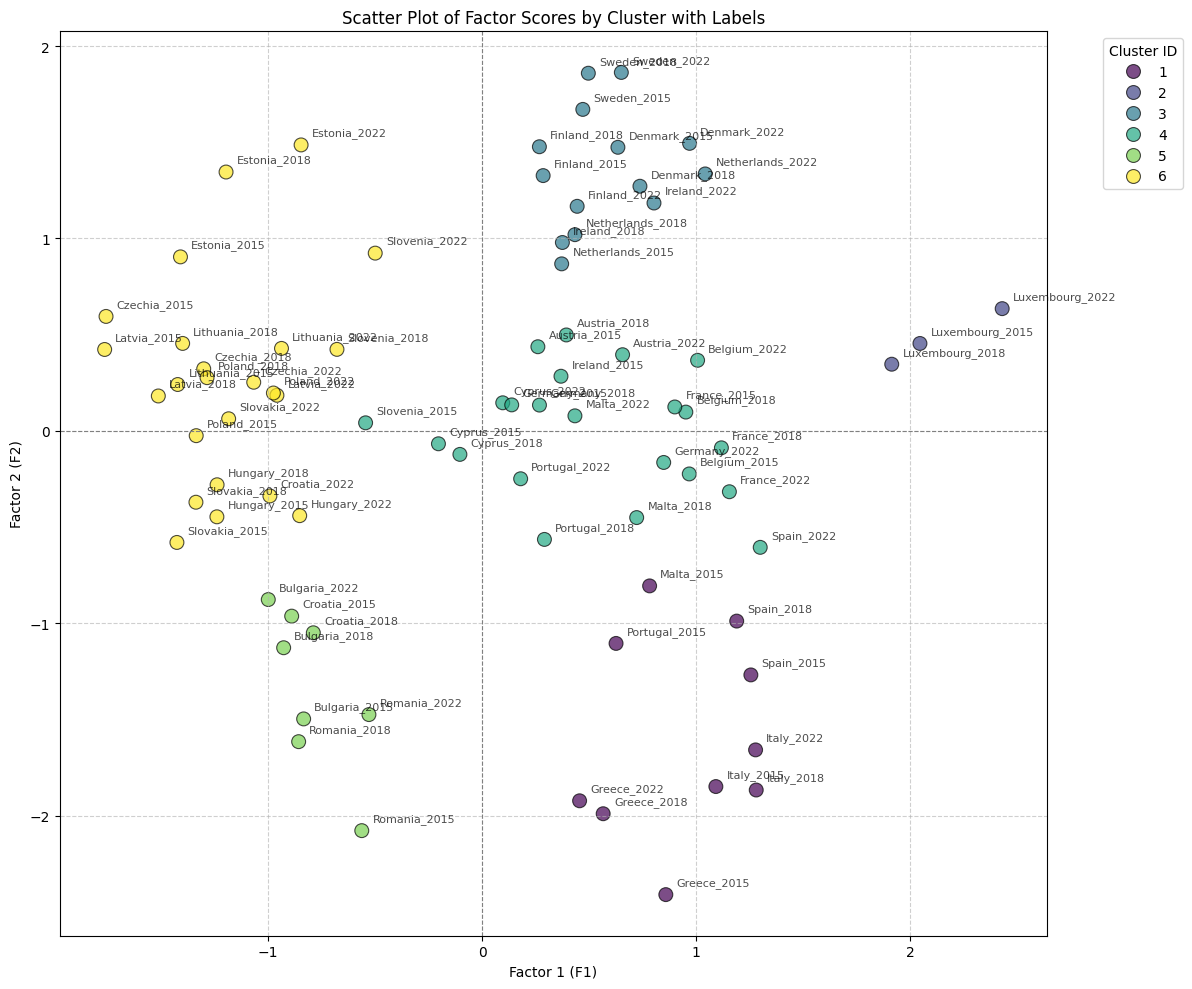

In [120]:
plt.figure(figsize=(12, 10)) # Increased figure size for better label visibility
sns.scatterplot(data=factor_scores_df, x='F1', y='F2', hue='Cluster', palette='viridis', s=100, edgecolor='black', alpha=0.7)

# Add labels to each point
for i, row in factor_scores_df.iterrows():
    plt.annotate(i, (row['F1'] + 0.05, row['F2'] + 0.05), fontsize=8, alpha=0.7)

plt.title('Scatter Plot of Factor Scores by Cluster with Labels')
plt.xlabel('Factor 1 (F1)')
plt.ylabel('Factor 2 (F2)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)
plt.legend(title='Cluster ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [121]:
factor_scores_df2 = factor_scores_df.drop(columns=['Cluster'], errors='ignore')
factor_scores_df2

,F1,F2
index_id,,
Austria_2015,0.260797,0.437391
Austria_2018,0.393669,0.498607
Austria_2022,0.656196,0.395963
Belgium_2015,0.967465,-0.223703
Belgium_2018,0.951426,0.097751
...,...,...
Spain_2018,1.188882,-0.988471
Spain_2022,1.298733,-0.605205
Sweden_2015,0.470564,1.670798


## Non-Hierarchical

In [122]:
#Perform K-means

kmeans = KMeans(n_clusters, init = initial_seeds.values) #your code here
kmeans.fit(factor_scores_df2) #your code here

KMeans(init=array([[ 0.93798609, -1.58611377],
       [ 2.12833531,  0.47874325],
       [ 0.5700744 ,  1.35638399],
       [ 0.50930306, -0.00496045],
       [-0.79711584, -1.33489328],
       [-1.19056871,  0.25932534]]),
       n_clusters=6)

In [123]:
#Assign Cluster Labels

factor_scores_df2['kmeans_cluster'] = kmeans.labels_
factor_scores_df2

,F1,F2,kmeans_cluster
index_id,,,
Austria_2015,0.260797,0.437391,3
Austria_2018,0.393669,0.498607,3
Austria_2022,0.656196,0.395963,3
Belgium_2015,0.967465,-0.223703,3
Belgium_2018,0.951426,0.097751,3
...,...,...,...
Spain_2018,1.188882,-0.988471,0
Spain_2022,1.298733,-0.605205,3
Sweden_2015,0.470564,1.670798,2


In [124]:
#R2

X = factor_scores_df2.drop(columns=['kmeans_cluster']).values
X_pred = kmeans.cluster_centers_[kmeans.labels_]

r2 = explained_variance_score(X, X_pred)
print(f"Overall R²: {r2:.3f}")

Overall R²: 0.864


In [125]:
#Compute R2 of each factor

X = factor_scores_df2.drop(columns=['kmeans_cluster']).copy()
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

r2_per_factor = {}

for i, col in enumerate(X.columns):
    y_true = X[col].values
    y_pred = centroids[labels, i]

    r2 = explained_variance_score(y_true, y_pred)
    r2_per_factor[col] = round(r2, 4)

print("R² per Factor:")
for factor, r2 in r2_per_factor.items():
    print(f"  {factor}: {r2}")

R² per Factor:
  F1: 0.8951
  F2: 0.8325


In [126]:
#Group by cluster and compute means

cluster_means =  factor_scores_df2.groupby('kmeans_cluster').mean() #your code here
cluster_means

,F1,F2
kmeans_cluster,,
0,0.937986,-1.586114
1,2.128335,0.478743
2,0.570074,1.356384
3,0.559432,-0.007196
4,-0.797116,-1.334893
5,-1.164682,0.250632


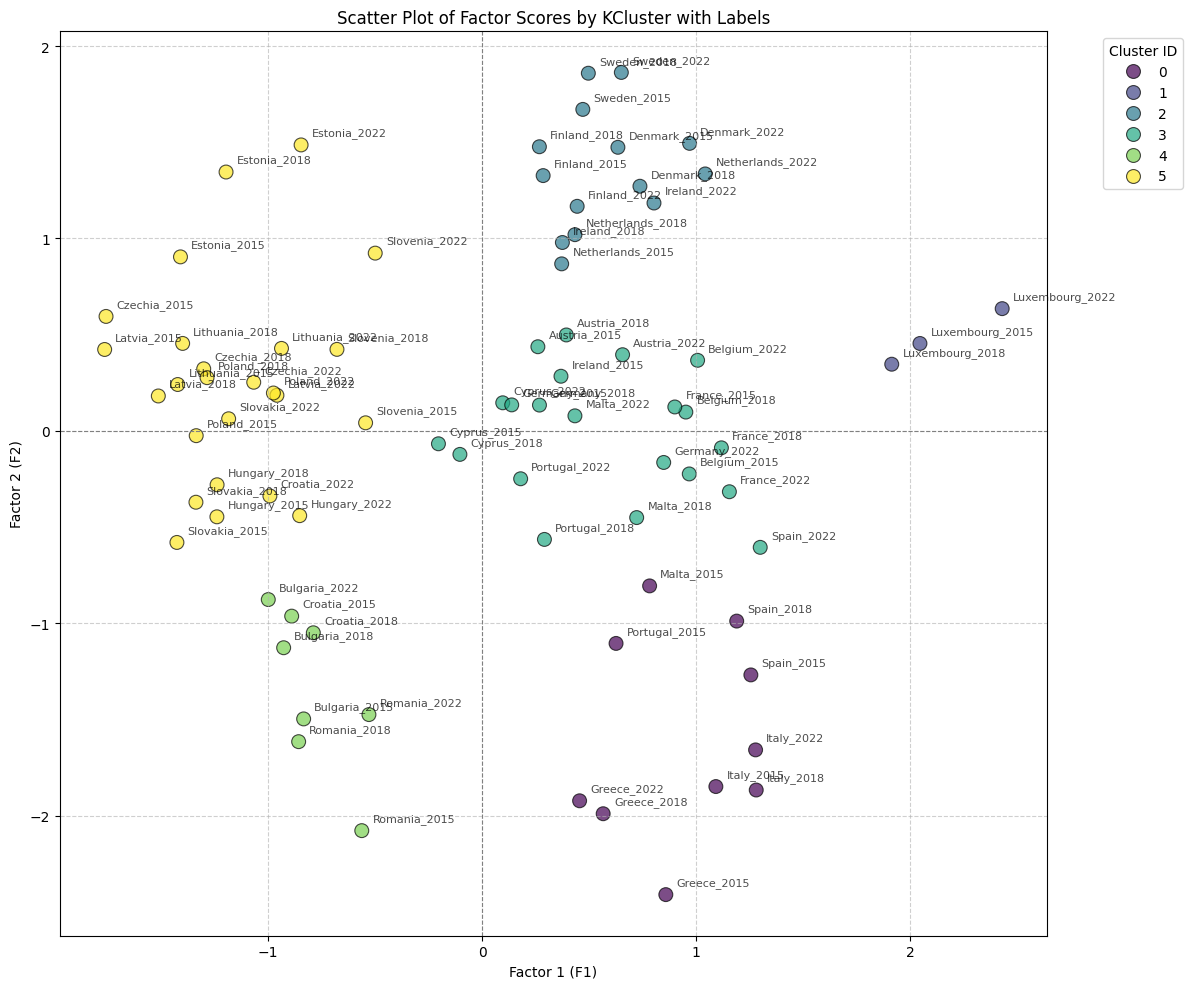

In [127]:
plt.figure(figsize=(12, 10)) # Increased figure size for better label visibility
sns.scatterplot(data=factor_scores_df2, x='F1', y='F2', hue='kmeans_cluster', palette='viridis', s=100, edgecolor='black', alpha=0.7)

# Add labels to each point
for i, row in factor_scores_df2.iterrows():
    plt.annotate(i, (row['F1'] + 0.05, row['F2'] + 0.05), fontsize=8, alpha=0.7)

plt.title('Scatter Plot of Factor Scores by KCluster with Labels')
plt.xlabel('Factor 1 (F1)')
plt.ylabel('Factor 2 (F2)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)
plt.legend(title='Cluster ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()